In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("playstore.csv")
df.shape

(10841, 13)

In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
df.info

<bound method DataFrame.info of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE

In [6]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [7]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               460
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
#1. Data clean up – Missing value treatment
#a. Drop records where rating is missing since rating is our target/study variabl

In [10]:
df[df["Rating"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7000.0,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5700.0,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3700.0,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7400.0,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2900.0,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82000.0,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7700.0,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9800.0,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9600.0,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [11]:
df1=df.dropna(subset = ["Rating"] , inplace=True)

In [12]:
print(df['Rating'].isnull().sum())

0


In [13]:
#b. Check the null values for the Android Ver column. 

In [14]:
df['Android Ver'].isnull().sum()

3

In [15]:
#i. Are all 3 records having the same problem?

In [16]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
#All three records have null values,so they have same problem...

In [18]:
#ii). Drop the 3rd record i.e. record for “Life Made WIFI …”

In [19]:
df.drop(axis = 0 , index = 10472 , inplace = True)
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [20]:
#iii). Replace remaining missing values with the mode

In [21]:
df['Android Ver'].mode()[0]

'4.1 and up'

In [22]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace = True)

In [23]:
df.loc[[4453,4490], :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,4.1 and up


In [24]:
df[df['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [25]:
####---- c. Current ver – replace with most common value ----#####

In [26]:
df['Current Ver'].isnull().sum()

4

In [27]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [28]:
df['Current Ver'].mode()[0]

'Varies with device'

In [29]:
df['Current Ver'].fillna(df['Current Ver'].mode() [0], inplace = True)

In [30]:
df.loc[[15,1553,6322,7333], :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",Varies with device,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",Varies with device,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",Varies with device,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",Varies with device,4.0 and up


In [31]:
#####---- 2. Data clean up – correcting the data types ----#####
#a. Which all variables need to be brought to numeric types


In [32]:
df['Reviews']=df['Reviews'].astype(int)
df['Size']=df['Size'].astype(int)

In [33]:
#b. Price variable – remove $ sign and convert to float


In [34]:
df['Price'].isnull().sum()

0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(1), int32(2), object(10)
memory usage: 1.2+ MB


In [36]:
# df['Price']= df['Price'].replace(to_replace="$",value="",)
# df['Price']=df['Price'].astype(float)

In [37]:
df['Price'] = df['Price'].str.replace('$', '',regex=True)
df['Price']=df['Price'].astype(float)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int32(2), object(9)
memory usage: 1.2+ MB


In [39]:
#c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [40]:
df["Installs"]=df["Installs"].str.replace(",","")
df["Installs"]=df["Installs"].str.replace("+","")
df["Installs"]=df["Installs"].astype(int)

<ipython-input-40-1b90b79efa91>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["Installs"]=df["Installs"].str.replace("+","")


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int32(3), object(8)
memory usage: 1.1+ MB


In [42]:
#d. Convert all other identified columns to numeric

In [43]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size                int32
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [44]:
df['Reviews']=df['Reviews'].astype(int)

In [45]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size                int32
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [46]:
# 3. Sanity checks – check for the following and handle accordingly

# a. Avg. rating should be between 1 and 5, as only these values are allowed on the play 
# store.
         # i. Are there any such records? Drop if so

In [47]:
df[(df['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [48]:
pd.unique(df[["Rating"]].values.ravel())

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [49]:
# ---> No, There are no such records.

In [50]:

# b. Reviews should not be more than installs as only those who installed can review the 
# app.
      # i. Are there any such records? Drop if so
    

In [51]:
df[df.Reviews>df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [52]:
df.shape

(9366, 13)

In [53]:
index=df[df.Reviews>df.Installs].index
df.drop(labels=index, inplace=True)

In [54]:
df[df.Reviews>df.Installs] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [55]:
# ---> records removed,where Reviews were more than Installs....

In [56]:
# 4. Identify and handle outliers – 
#    a. Price column
#       i. Make suitable plot to identify outliers in price

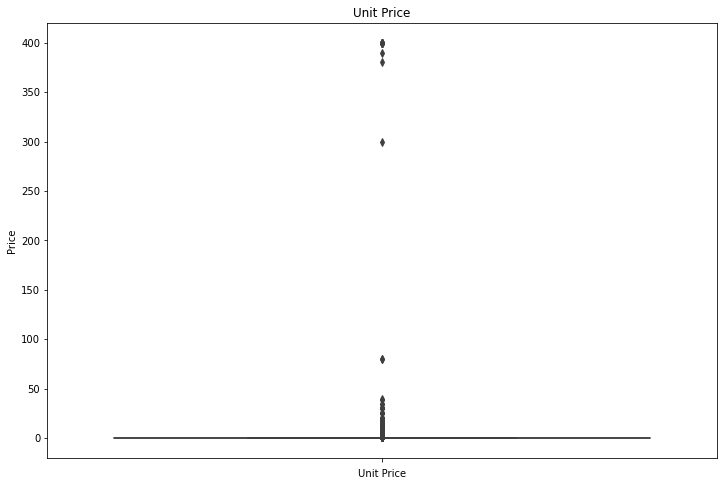

In [57]:
plt.subplots(figsize =(12,8))
sns.boxplot(y="Price",data=df , orient = "vertical")

plt.xlabel("Unit Price")
plt.title("Unit Price")

plt.show()

In [58]:
# plt.boxplot(df['Price'])
# plt.xlabel("Unit Price")
# plt.title("Unit Price")
# plt.show()

In [59]:
#ii. Do you expect apps on the play store to cost $200? Check out these cases

In [60]:
df.loc[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [61]:
drp = df[df['Price'] > 30].index
df.drop(labels=drp, inplace=True)

In [62]:
records = df.loc[df['Price'] > 30].index
records.value_counts().sum()

0

In [63]:
# iii. After dropping the useless records, make the suitable plot again to identify 
# outliers

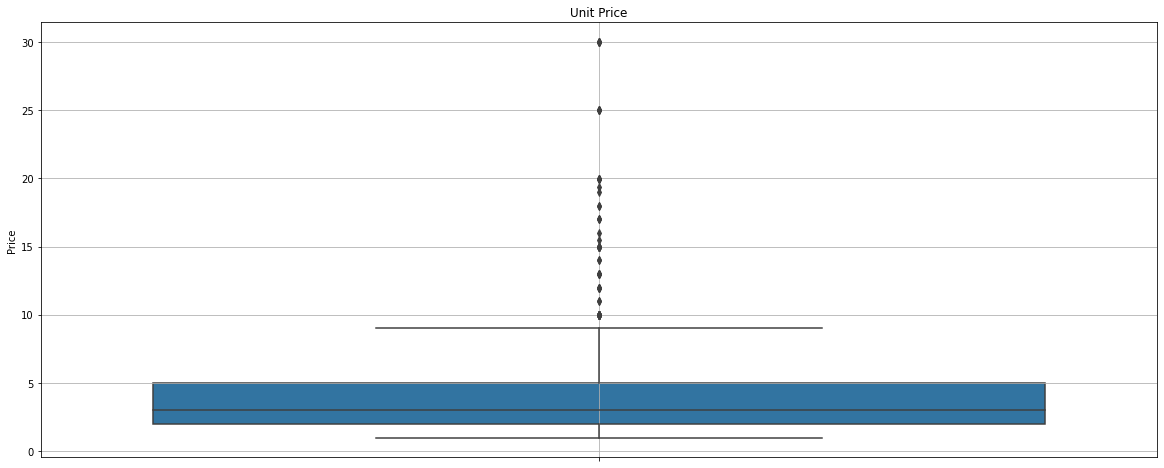

In [64]:
usful_df = df[df['Price'] != 0]
# usful_df
plt.subplots(figsize=(20,8))
# sns.boxplot(usful_df.Price)
sns.boxplot(y="Price",data=usful_df, orient = "vertical")

plt.title("Unit Price")
plt.grid()
plt.show()

In [65]:
#iv. Limit data to records with price < $30

In [66]:
limit_data = df[df['Price'] < 30]
limit_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [67]:
limit_data.shape

(9338, 13)

In [68]:
# b. Reviews column
   
    # i. Make suitable plot

Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241071
FAMILY                  410221801
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17547629
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12866394
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714372
MEDICAL                   1585000
AUTO_AND_VEHICLES         1163630
LIBRA

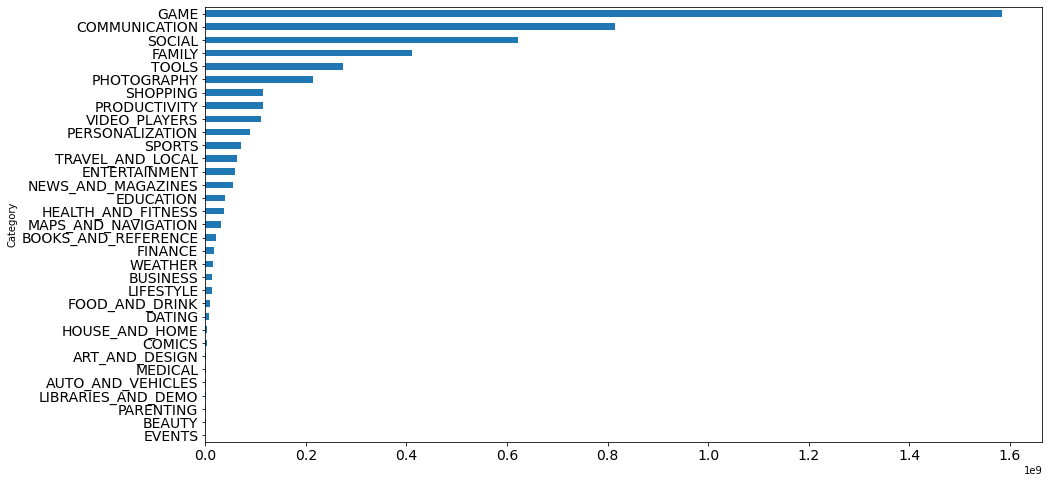

In [69]:
df2=df.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
df2.plot(kind='barh', fontsize=14)
print(df2.sort_values(ascending=False))
plt.show()

In [70]:
#ii. Limit data to apps with < 1 Million reviews

In [71]:
df[df['Reviews'] < 1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [72]:
#---->We found 8655 rows of limited data to apps with < 1 Million reviews


In [73]:
drp2 = df[df['Reviews'] > 1000000 ].index
df.drop(labels = drp2, inplace=True)
print(drp2.value_counts().sum(),'cols dropped')

704 cols dropped


In [74]:
#c. Installs
  
    #i. What is the 95th percentile of the installs?

In [75]:
per = df.Installs.quantile(0.95) # 95th percentile
print(per)

10000000.0


In [76]:
#--->100000000.0 is the 95th percentile of the installs

In [77]:

#ii. Drop records having a value more than the 95th percentile

In [78]:
x = df.Installs.quantile() > per
print (x)

False


In [79]:
#there is no value more than 95th percentile...

In [80]:
# Data analysis to answer business questions
 
    # 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower 
     # values?
        
       # a. How do you explain this?

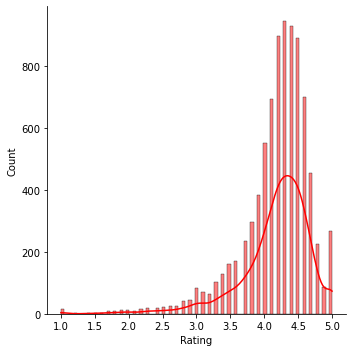

In [81]:
sns.displot(df['Rating'],color="red",kde = True)
plt.show()

In [82]:
#b. What is the implication of this on your analysis?

In [83]:
#--->it is negatively skewed tailed towards left side of the disribution
#--->Since mode>= median > mean, the distribution of Rating is Negatively Skewed.Therefore distribution of Rating 
# is more Skewed towards lower values.

In [84]:

#6. What are the top Content Rating values?
    
    #a. Are there any values with very few records?

In [85]:
df["Content Rating"].value_counts()

Everyone           6943
Teen                933
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [86]:
#Adults only 18+ and Unrated are values with very few records so we will drop them.

In [87]:
# b. If yes, drop those as they won’t help in the analysis

In [88]:
df4=df[(df['Content Rating']=='Adults only 18+')|(df['Content Rating']=='Unrated')]
df.drop(df4.index,inplace=True)

In [89]:
df['Content Rating'].value_counts()

Everyone        6943
Teen             933
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

In [90]:
#7. Effect of size on rating
   #a. Make a joinplot to understand the effect of size on rating

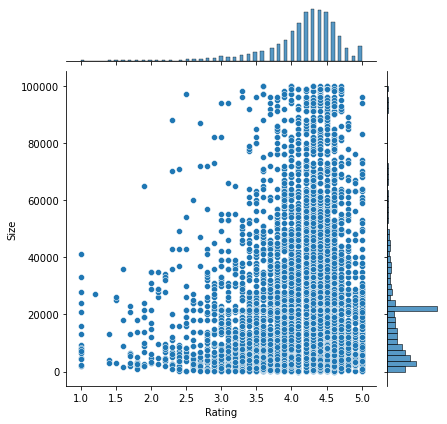

In [92]:
sns.jointplot(x=df['Rating'],y=df['Size'],data=df,kind='scatter')
plt.show()

In [ ]:
#b. Do you see any patterns?

In [ ]:
#--->We observed that the maximum data point gather in between Rating 4.0-4.5 and size 0-40000.

In [ ]:
#c. How do you explain the pattern?

In [ ]:
#---->Generally on increasing Rating, Size of App also increases. 
# But this is not always true ie. for higher Rating, their is constant Size.
# Thus we can conclude that their is positive correlation between Size and Rating.
# the application size which is in between 0-40000(40 mb) get good rating on play store.


In [ ]:
#8. Effect of price on rating
  
    # a. Make a jointplot (with regression line)

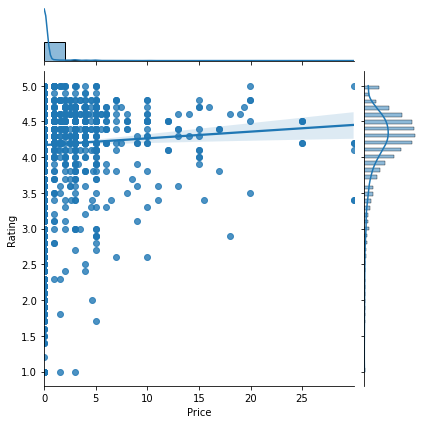

In [93]:
sns.jointplot(x='Price', y='Rating', data=df, kind='reg')
plt.show()

In [ ]:
#b. What pattern do you see?

In [ ]:
#Generally on increasing the Price, Rating remains almost constant greater than 4.

In [ ]:
#c. How do you explain the pattern?

In [ ]:
#Since on increasing the Price, Rating remains almost constant greater than 4. 
# Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

In [ ]:
# d. Replot the data, this time with only records with price > 0 

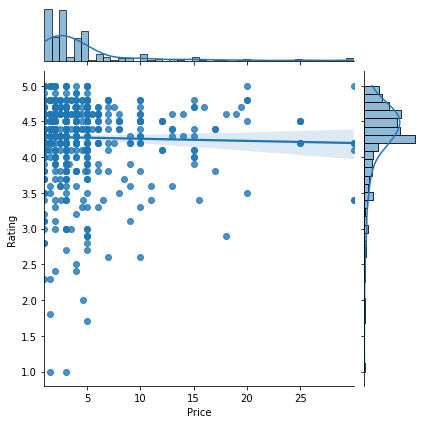

In [94]:
pg0 = df[df['Price'] > 0]
sns.jointplot(x ="Price" , y = "Rating" ,data = pg0, kind = "reg" )
plt.show()

In [ ]:
#e. Does the pattern change?

In [ ]:
# Yes, On limiting the record with Price > 0,
# the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

In [95]:
pg0.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.095986,0.117942,0.063960,-0.025975
Reviews,0.095986,1.000000,0.163959,0.787628,-0.049764
Size,0.117942,0.163959,1.000000,0.119255,0.024912
Installs,0.063960,0.787628,0.119255,1.000000,-0.057710
Price,-0.025975,-0.049764,0.024912,-0.057710,1.000000


In [ ]:
#f. What is your overall inference on the effect of price on the rating

In [ ]:
#Generally increasing the Prices, doesn't have signifcant effect on Higher Rating.
# For Higher Price, Rating is High and almost constant ie greater than 4

In [ ]:
#9. Look at all the numeric interactions together – 
  
    # a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

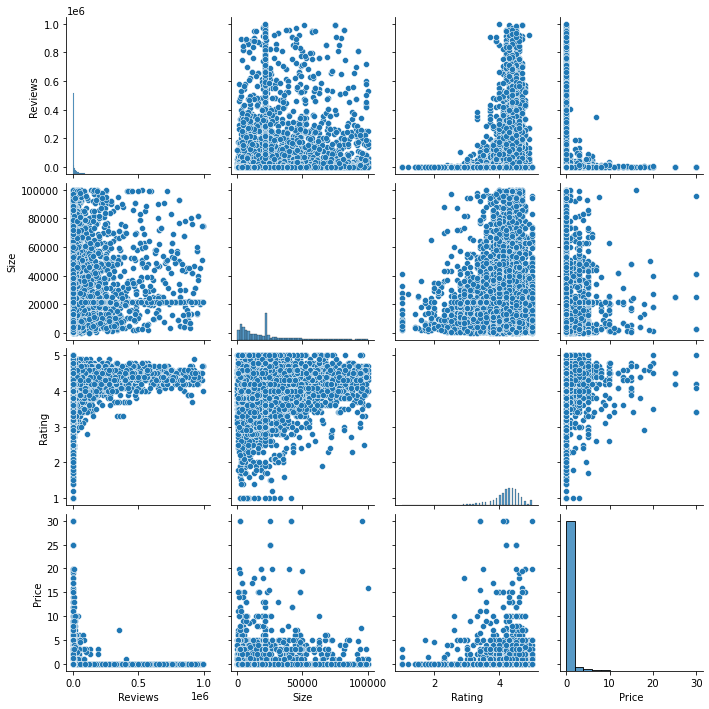

In [97]:
sns.pairplot(df, vars=['Reviews', 'Size', 'Rating', 'Price'])
plt.show()

In [ ]:
#10. Rating vs. content rating
   
    # a. Make a bar plot displaying the rating for each content rating

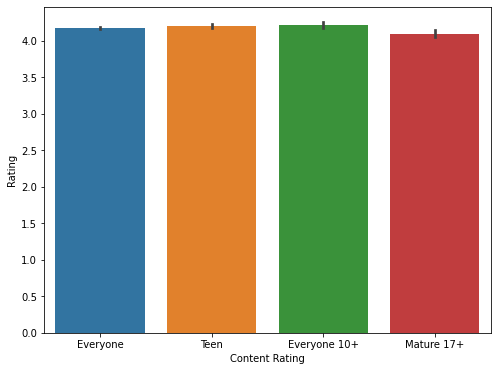

In [125]:
plt.figure(figsize = (8,6))

sns.barplot(x = "Content Rating", y ="Rating", data = df)

plt.show()

In [ ]:
#b. Which metric would you use? Mean? Median? Some other quantile?

In [ ]:
#We must use Median in this case as we are having Outliers in Rating. 
# Because in case of Outliers , median is the best measure of central tendency.

In [ ]:
#c. Choose the right metric and plot

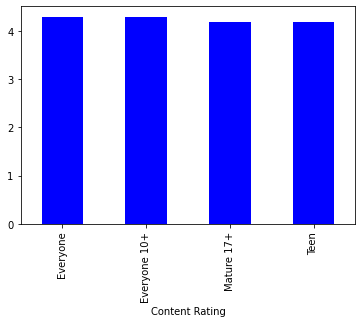

In [127]:
df.groupby(['Content Rating'])['Rating'].median().plot.bar(color="blue")
plt.show()

In [ ]:
#11. Content rating vs. size vs. rating – 3 variables at a time
 
    # a. Create 5 buckets (20% records in each) based on Size

In [128]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.146001,4.247561,4.010582,4.182275
20k-40k,4.203324,4.166667,4.156291,4.173163
40k-60k,4.171457,4.265217,4.190476,4.242982
60k-80k,4.244221,4.280769,4.200000,4.273016
80k-100k,4.260127,4.304762,4.252632,4.269231


In [ ]:
#b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each 
# combination

In [129]:
temp=pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.10,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


In [ ]:
#c. Make a heatmap of this
  
    # i. Annotated

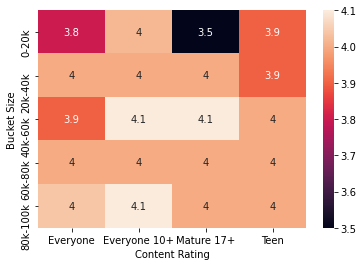

In [131]:
sns.heatmap(temp, annot = True)
plt.show()


In [ ]:
#ii. Greens color map

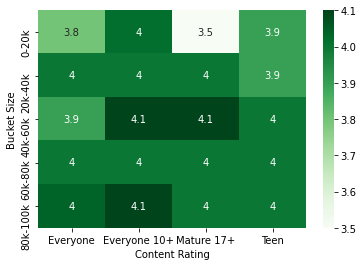

In [132]:
sns.heatmap(temp, annot=True, cmap='Greens')
plt.show()


In [ ]:
#d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

In [ ]:
#Based on analysis, its not true that lighter apps are preferred in all categories.
# Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. 
# So, in general we can conclude that heavier apps are preferred in all categories.